Keerthana Aluru - 700778365
* ICP-3 (01/28/2025)


**1. Data Manipulation**

In [1]:
# importing necessary libraries for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the data
df = pd.read_csv('data.csv')

In [3]:
# basic statistics about the data
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [4]:
# checking if the null values
df.isnull().sum()

,0
Duration,0
Pulse,0
Maxpulse,0
Calories,5


In [5]:
# view basic information about the featues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [6]:
# replacing the null values in column calories with mean
# df['Calories'].fillna(df.Calories.mean(),inplace=True) # This method gives warning in pandas 3.0
df['Calories'] = df['Calories'].fillna(df['Calories'].mean())

In [7]:
# checking the null values after replacing with mean
df.isnull().sum()

,0
Duration,0
Pulse,0
Maxpulse,0
Calories,0


In [8]:
# the aggregate information with various funtions on columns Pulse and Maxpulse
df[['Pulse','Maxpulse']].agg(['min','max','count','mean'])

,Pulse,Maxpulse
min,80.000000,100.000000
max,159.000000,184.000000
count,169.000000,169.000000
mean,107.461538,134.047337


In [9]:
# filter the dataframe to select the rows with calories between 500 and 1000
df.loc[(df.Calories >= 500) & (df.Calories <= 1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [10]:
# filter the dataframe to select the rows with calories values > 500 and pulse < 100
df.loc[(df.Calories > 500) & (df.Pulse <= 100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
79,270,100,131,1729.0
87,120,100,157,1000.1
99,90,93,124,604.1
103,90,90,100,500.4


In [11]:
# creating a new 'modified_df' data frame that contains all the columns from df except "Maxpulse"
df_modified = df.drop('Maxpulse',axis = 1)

In [12]:
# view the head of new data frame
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [13]:
# delete the maxpulse column from the main datafram
df.drop('Maxpulse',axis = 1,inplace=True)
df.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [14]:
# converting the datatype of column Calories to int datatype
df['Calories'] = df.Calories.astype(int)

In [15]:
# display info to see the data type of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Duration  169 non-null    int64
 1   Pulse     169 non-null    int64
 2   Calories  169 non-null    int64
dtypes: int64(3)
memory usage: 4.1 KB


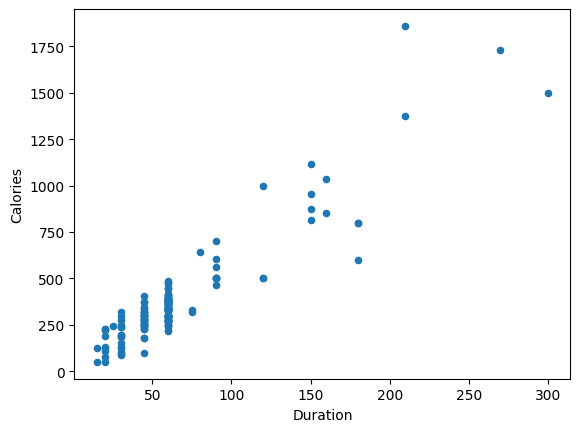

In [16]:
# Using pandas create a scatter plot for the two columns (Duration and Calories)
df.plot(x = 'Duration', y = 'Calories', kind = 'scatter')
plt.show()

**2. Linear Regression**

In [17]:
# read the dataset
salary_df = pd.read_csv('Salary_Data.csv')

In [18]:
# display basic information about the features
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [19]:
# import necessary libraries
from sklearn.model_selection import train_test_split

In [20]:
# arrange the data to numpy arrays
X = salary_df.iloc[:, :-1].values
y = salary_df.iloc[:, 1].values

In [21]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,y,random_state = 0,test_size= 0.35)

In [22]:
# Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [23]:
LinearRegression()

LinearRegression()

In [24]:
# Predicting the Test set result

Y_Pred = regressor.predict(X_Test)

In [25]:
# calculate the Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error

In [26]:
mse = mean_squared_error(Y_Test,Y_Pred)

In [27]:
mse

19421097.588238075

In [28]:
m = regressor.intercept_
c = regressor.coef_

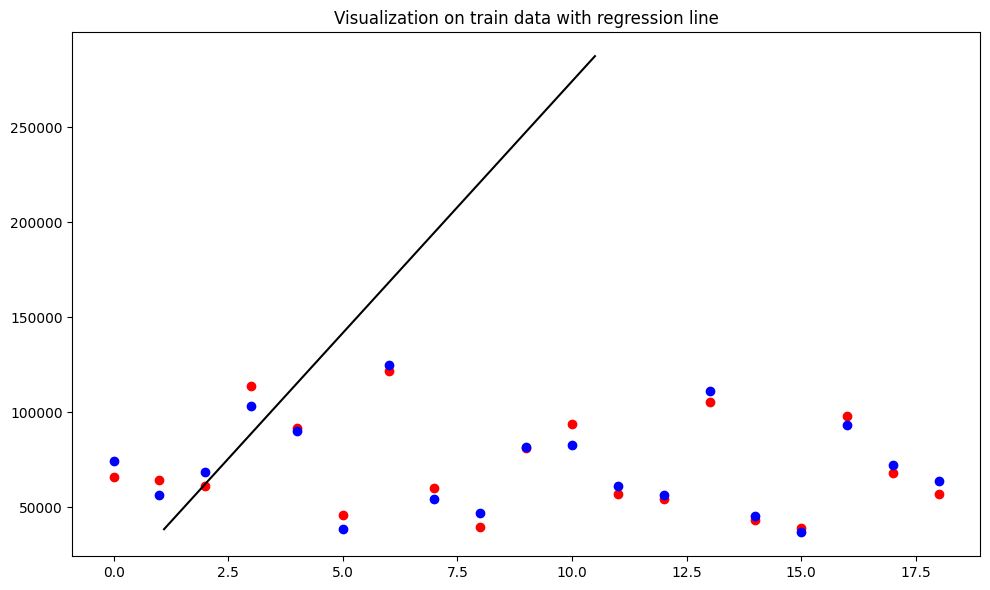

In [29]:
# visulalize both train set results

x = np.arange(X_Train.shape[0])
y_train_pred = regressor.predict(X_Train)
plt.figure(figsize=(10,6))
plt.plot(X,m*X+c,c='black')
plt.scatter(x, Y_Train, color = 'r', linewidth=1)
plt.scatter(x,y_train_pred, color = 'b', linewidth=1)
plt.title("Visualization on train data with regression line")
plt.tight_layout()

plt.show()

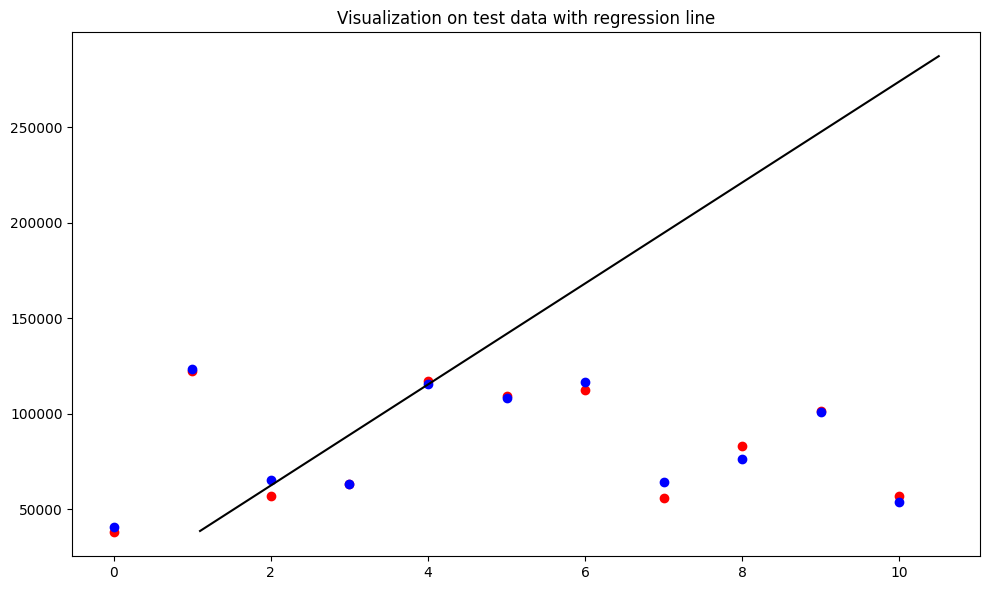

In [30]:
# visulalize both test set results

x = np.arange(X_Test.shape[0])
y_test_pred = regressor.predict(X_Test)
plt.figure(figsize=(10,6))
plt.plot(X,m*X+c,c='black')
plt.scatter(x, Y_Test, color = 'r', linewidth=1)
plt.scatter(x,y_test_pred, color = 'b', linewidth=1)
plt.title("Visualization on test data with regression line")
plt.tight_layout()

plt.show()

In [31]:
m # regressor intercept

26469.683995470266

In [32]:
c # regressor coefficient

array([9388.04802711])